In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import math
import scipy.stats as ss
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# the above code and 

/kaggle/input/phishing-dataset-for-machine-learning/Phishing_Legitimate_full.csv


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow # installing tensorflow which will help in training deep learning models

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement keras<2.16,>=2.15.0 (from tensorflow) (from versions: none)
ERROR: No matching distribution found for keras<2.16,>=2.15.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models

2024-08-05 17:12:31.042101: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 17:12:31.042247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 17:12:31.240535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
data = pd.read_csv("/kaggle/input/phishing-dataset-for-machine-learning/Phishing_Legitimate_full.csv") #uploading the dataset

In [6]:
data.head() #

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [7]:
data.info() # getting basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [8]:
print("Total missing values : ",sum(list(data.isna().sum()))) # checking if there are any missing values in the dataset

Total missing values :  0


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


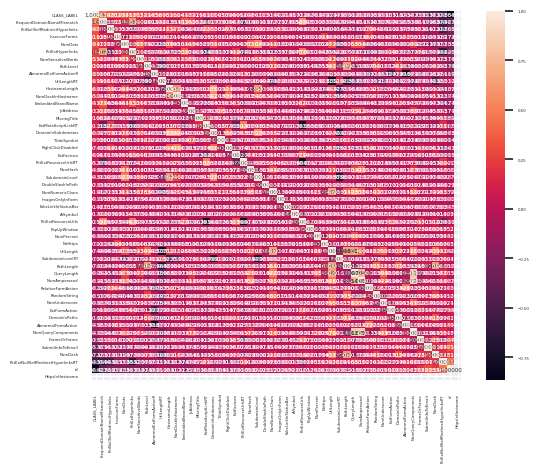

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corelation = data.corr()
columns = corelation.nlargest(50, 'CLASS_LABEL')['CLASS_LABEL'].index
cm = np.corrcoef(data[columns].values.T)
sns.set_theme(font_scale=0.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.5f', annot_kws={'size': 4}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()
# Constructing a heat map which will help us understand the correlation between the features.

In [10]:
# Though the heat map is bit clumy, from the above matrixwe can understand there is high variation of correlation among the features, and there is no sign of twin variables. 
# Another observation is that the variable "CLASS_Label" can be treated as target variable.

In [11]:
print (data["CLASS_LABEL"].unique())

[1 0]


In [12]:
# We can understand that the "CLASS_LABEL" refers to the type of mail meaning 1 referes to legitimate and 0 refers to illegitimate

In [13]:
class_counts = data['CLASS_LABEL'].value_counts()
print(class_counts)

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


In [14]:
# There are equal number of entries in each of the class label which will be helpfull in proper training of the model by reducing the bias and helps in improving the generalization.
# Now since there is a huge number of features let us filter out numerical and categorical features seperately and understand its corelation with the target variable thereby we can filter out many unnecessary feature.

In [15]:
# separate the target variable
label = data.pop('CLASS_LABEL')
ids   = data.pop('id')

# list of categorical features
categorical_features = [
    'AtSymbol','TildeSymbol','NoHttps','RandomString','IpAddress','DomainInSubdomains','DomainInPaths',
    'HttpsInHostname','DoubleSlashInPath','EmbeddedBrandName','ExtFavicon','InsecureForms','RelativeFormAction',
    'ExtFormAction','AbnormalFormAction','FrequentDomainNameMismatch','FakeLinkInStatusBar','RightClickDisabled',
    'PopUpWindow','SubmitInfoToEmail','IframeOrFrame','MissingTitle','ImagesOnlyInForm','SubdomainLevelRT',
    'UrlLengthRT','PctExtResourceUrlsRT','AbnormalExtFormActionR','ExtMetaScriptLinkRT','PctExtNullSelfRedirectHyperlinksRT'
]

# list of numerical features
numerical_features = [x for x in data.columns if x not in categorical_features]

In [16]:
len(categorical_features)

29

In [17]:
len(numerical_features)

19

In [18]:
categorical_data = data[categorical_features]

# change the datatype to categorical for all columns
for feature in categorical_data.columns:
    categorical_data[feature] = categorical_data[feature].astype('category')
    
# summary statistics for categorical features
categorical_data.describe()

/tmp/ipykernel_33/2138061778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[feature] = categorical_data[feature].astype('category')


,AtSymbol,TildeSymbol,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,DoubleSlashInPath,EmbeddedBrandName,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,3,3,3,3,3,3
top,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,1
freq,9997,9869,9888,5252,9828,9778,5711,10000,9991,9429,...,8712,6604,9678,9696,9666,3465,6341,8469,3988,6094


In [19]:
#Checking Correlation of categorical features with the target variable
#The Uncertainity Coefficient (Theil's U) which represents the following relation between two nominal random variables X and Y, given X how well can we predict Y.

In [20]:
def conditional_entropy(x,y):
    """
    Calculates the conditional entropy of two random varibales X and Y
    wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    """
    
    y_counter  = Counter(y) # count of all possible y's (the differnt values that the feature can take and their frequency)
    xy_counter = Counter(list(zip(x,y))) # count of all possible pairs of x and y
    
    total_occurences = sum(y_counter.values())
    entropy = 0.0
    
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy]/total_occurences
        p_y  = y_counter[xy[1]]/total_occurences
        entropy += p_xy*math.log(p_y/p_xy,math.e)
    
    return entropy


In [21]:
def theils_u(x,y):
    """
    Calculates the Theil's Uncertainity Coefficient between two random variables X and Y
    wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    """
    
    h_xy = conditional_entropy(x,y) # condtitonal entropy of X and Y
    x_counter = Counter(x) # count of all possible values of X
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values())) # probability distribution of X
    h_x = ss.entropy(p_x)
    if h_x == 0:
        return 1
    else:
        return (h_x - h_xy) / h_x

In [22]:
# calculating the coefficient of correlation between `label` and all the categorical features
from collections import Counter
import math
import scipy.stats as ss
uc_scores = dict()

for feature in categorical_features:
    y  = categorical_data[feature]
    uc = theils_u(label,y)
    uc_scores[feature] = uc
    
# sort the scores in descending order
uc_scores = sorted(uc_scores.items(),key=lambda kv: (kv[1],kv[0]),reverse=True)
for k,v in uc_scores:
    print("{} : {}".format(k,v))

PctExtNullSelfRedirectHyperlinksRT : 0.30640684532617585
FrequentDomainNameMismatch : 0.18104492423293908
ExtMetaScriptLinkRT : 0.16957923020651786
SubmitInfoToEmail : 0.1125679667056817
InsecureForms : 0.07946502625455433
PctExtResourceUrlsRT : 0.040843553824205354
IframeOrFrame : 0.04047475571797762
AbnormalExtFormActionR : 0.026208142124493995
UrlLengthRT : 0.021840281668367986
IpAddress : 0.0174171493137134
AbnormalFormAction : 0.016142805575150146
EmbeddedBrandName : 0.015382133840065811
MissingTitle : 0.010609090692902206
DomainInPaths : 0.010103889912071663
ExtFormAction : 0.008099211801888878
DomainInSubdomains : 0.007931099697501191
TildeSymbol : 0.007737063288187011
SubdomainLevelRT : 0.0064973854391998515
RandomString : 0.005256076816576079
RelativeFormAction : 0.0049335643680913305
RightClickDisabled : 0.004362782255926228
PopUpWindow : 0.004211754857410474
NoHttps : 0.0041187624630195365
ExtFavicon : 0.0034599137633324387
DoubleSlashInPath : 0.0004474212774166851
AtSymbol 

In [23]:
#The categorical features with the highest correlation with target variable are
#PctExtNullSelfRedirectHyperlinksRT', 'FrequentDomainNameMismatch', 'ExtMetaScriptLinkRT', 'SubmitInfoToEmail'

In [24]:
# filter the above features
filtered_cats = ['PctExtNullSelfRedirectHyperlinksRT','ExtMetaScriptLinkRT','FrequentDomainNameMismatch','SubmitInfoToEmail','InsecureForms','PctExtResourceUrlsRT','IframeOrFrame','AbnormalExtFormActionR','UrlLengthRT']
filtered_cat_data = categorical_data[filtered_cats]

# revert the datatype to int32
for feature in filtered_cat_data.columns:
    filtered_cat_data[feature] = filtered_cat_data[feature].astype('int32')     

# sample
filtered_cat_data.head()

/tmp/ipykernel_33/1667274823.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cat_data[feature] = filtered_cat_data[feature].astype('int32')
/tmp/ipykernel_33/1667274823.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cat_data[feature] = filtered_cat_data[feature].astype('int32')
/tmp/ipykernel_33/1667274823.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,PctExtNullSelfRedirectHyperlinksRT,ExtMetaScriptLinkRT,FrequentDomainNameMismatch,SubmitInfoToEmail,InsecureForms,PctExtResourceUrlsRT,IframeOrFrame,AbnormalExtFormActionR,UrlLengthRT
0,1,-1,0,0,1,1,0,1,0
1,1,1,0,0,1,1,0,1,-1
2,0,-1,0,0,1,-1,0,1,0
3,-1,1,1,1,1,1,0,1,-1
4,-1,-1,1,0,0,-1,1,0,1


In [25]:
# analysis of numerical features

numerical_data = data[numerical_features]

# summary statistics for numerical features
numerical_data.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,HostnameLength,PathLength,QueryLength,NumSensitiveWords,PctExtHyperlinks,PctExtResourceUrls,PctNullSelfRedirectHyperlinks
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,18.82430,35.564900,8.606500,0.109300,0.241334,0.392932,0.136136
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,8.11654,24.588502,24.313053,0.368737,0.342370,0.387292,0.312413
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,14.00000,18.000000,0.000000,0.000000,0.000000,0.030303,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,18.00000,30.000000,0.000000,0.000000,0.071429,0.247511,0.000000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,22.00000,48.000000,0.000000,0.000000,0.315874,0.785714,0.047619
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,18.00000,19.000000,23.000000,22.000000,1.000000,111.000000,137.00000,161.000000,188.000000,3.000000,1.000000,1.000000,1.000000


In [26]:
#Checking Correlation of numerical features with the target variable
#The Point Biserial Correlation Coefficient measures the correlation between a dichotomous variable Y and a continous variable X.

In [27]:
# calculate point biserial coefficient between numerical features and the target variable

rpb_scores = dict()

for feature in numerical_features:
    y = numerical_data[feature]
    rpb = abs(ss.pointbiserialr(y,label).correlation)
    rpb_scores[feature] = rpb
    
# sort the scores in descending order
rpb_scores = sorted(rpb_scores.items(),key=lambda kv: (kv[1],kv[0]),reverse=True)
for k,v in rpb_scores:
    print("{} : {}".format(k,v))

NumDash : 0.37223491648822243
PctNullSelfRedirectHyperlinks : 0.34280619253503297
NumDots : 0.2941113745741385
PctExtHyperlinks : 0.25972792319002624
NumSensitiveWords : 0.25520807467651013
PathLevel : 0.22945038959688044
HostnameLength : 0.1691568937417125
NumDashInHostname : 0.15044434207453125
NumQueryComponents : 0.14739070133291554
NumUnderscore : 0.09886920740580152
NumAmpersand : 0.08144631548410983
QueryLength : 0.0805245582508595
PathLength : 0.07612474993254581
UrlLength : 0.07449306083766773
NumPercent : 0.06846489880098748
NumHash : 0.04801356261566736
SubdomainLevel : 0.043132354036452145
PctExtResourceUrls : 0.021922159435337943
NumNumericChars : 0.01912159923106215


In [28]:
filtered_nums = ['NumDash', 'PctNullSelfRedirectHyperlinks', 'NumDots', 'PctExtHyperlinks', 'NumSensitiveWords', 'PathLevel', 'HostnameLength', 'NumDashInHostname', 'NumQueryComponents','NumUnderscore','NumAmpersand','QueryLength']
filtered_num_data = data[filtered_nums]

In [29]:
# merge the filtered categorical and numerical data
filtered_data = pd.concat([filtered_num_data,filtered_cat_data],axis=1)
filtered_data['label'] = label

In [30]:
filtered_data.head()

,NumDash,PctNullSelfRedirectHyperlinks,NumDots,PctExtHyperlinks,NumSensitiveWords,PathLevel,HostnameLength,NumDashInHostname,NumQueryComponents,NumUnderscore,...,PctExtNullSelfRedirectHyperlinksRT,ExtMetaScriptLinkRT,FrequentDomainNameMismatch,SubmitInfoToEmail,InsecureForms,PctExtResourceUrlsRT,IframeOrFrame,AbnormalExtFormActionR,UrlLengthRT,label
0,0,0.0,3,0.000,0,5,21,0,0,0,...,1,-1,0,0,1,1,0,1,0,1
1,0,0.0,3,0.000,1,3,17,0,2,2,...,1,1,0,0,1,1,0,1,-1,1
2,0,0.0,3,0.375,0,2,27,0,0,0,...,0,-1,0,0,1,-1,0,1,0,1
3,1,0.0,3,1.000,0,6,22,0,0,0,...,-1,1,1,1,1,1,0,1,-1,1
4,0,0.0,3,1.000,0,4,10,0,0,0,...,-1,-1,1,0,0,-1,1,0,1,1


In [31]:
#Splitting the data set for model creation, we split the dataset into 2 sets oen which will be used for testing and other which will be used for training.

In [40]:
X = data
y = label.values

# One-hot encode the target variable if it's a classification problem with multiple classes
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
def build_resnet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    
    # First residual block
    res = layers.Dense(64, activation='relu')(x)
    res = layers.BatchNormalization()(res)
    res = layers.Dense(64, activation=None)(res)
    res = layers.BatchNormalization()(res)
    x = layers.add([x, res])
    x = layers.Activation('relu')(x)

    # Second residual block
    res = layers.Dense(64, activation='relu')(x)
    res = layers.BatchNormalization()(res)
    res = layers.Dense(64, activation=None)(res)
    res = layers.BatchNormalization()(res)
    x = layers.add([x, res])
    x = layers.Activation('relu')(x)

    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

input_shape = (X_train.shape[1],)
num_classes = y_train.shape[1]

resnet_model = build_resnet(input_shape, num_classes)
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8090 - loss: 0.4642 - val_accuracy: 0.9381 - val_loss: 0.1742
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9430 - loss: 0.1489 - val_accuracy: 0.9463 - val_loss: 0.1444
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9529 - loss: 0.1215 - val_accuracy: 0.9469 - val_loss: 0.1323
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9619 - loss: 0.1005 - val_accuracy: 0.9488 - val_loss: 0.1254
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9673 - loss: 0.0928 - val_accuracy: 0.9556 - val_loss: 0.1271
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0825 - val_accuracy: 0.9550 - val_loss: 0.1264
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.0729 - val_accuracy: 0.9613 - val_loss: 0.1161
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0648 - val_accuracy: 0.

In [42]:
def build_gru(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.GRU(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (X_train.shape[1], 1)  # GRU expects 3D input: (batch_size, timesteps, features)
X_train_gru = np.expand_dims(X_train, axis=-1)
X_test_gru = np.expand_dims(X_test, axis=-1)

gru_model = build_gru(input_shape, num_classes)
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

gru_model.fit(X_train_gru, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6632 - loss: 0.5946 - val_accuracy: 0.7700 - val_loss: 0.4640
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8075 - loss: 0.4347 - val_accuracy: 0.8131 - val_loss: 0.4190
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8174 - loss: 0.3990 - val_accuracy: 0.8250 - val_loss: 0.3985
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8272 - loss: 0.3864 - val_accuracy: 0.8275 - val_loss: 0.3799
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8310 - loss: 0.3758 - val_accuracy: 0.8375 - val_loss: 0.3717
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8525 - loss: 0.3395 - val_accuracy: 0.8612 - val_loss: 0.3342
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8680 - loss: 0.3102 - val_accuracy: 0.8737 - val_loss: 0.2941
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8774 - loss: 0.2870 - val_accu

In [44]:
def build_lstm(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.LSTM(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (X_train.shape[1], 1)  # LSTM expects 3D input: (batch_size, timesteps, features)
X_train_lstm = np.expand_dims(X_train, axis=-1)
X_test_lstm = np.expand_dims(X_test, axis=-1)

lstm_model = build_lstm(input_shape, num_classes)
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6236 - loss: 199.2953 - val_accuracy: 0.7269 - val_loss: 0.6651
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7101 - loss: 0.6655 - val_accuracy: 0.7181 - val_loss: 0.6502
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7209 - loss: 0.6508 - val_accuracy: 0.7431 - val_loss: 0.6277
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7463 - loss: 0.6241 - val_accuracy: 0.7331 - val_loss: 0.6084
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7399 - loss: 0.6047 - val_accuracy: 0.7575 - val_loss: 0.5775
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7409 - loss: 0.5723 - val_accuracy: 0.7600 - val_loss: 0.5243
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7596 - loss: 0.5055 - val_accuracy: 0.7919 - val_loss: 0.4772
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7697 - loss: 1.0038 - val_ac

In [45]:
# ResNet predictions and evaluation
resnet_predictions = np.argmax(resnet_model.predict(X_test), axis=1)
resnet_y_true = np.argmax(y_test, axis=1)

resnet_accuracy = accuracy_score(resnet_y_true, resnet_predictions)
resnet_precision = precision_score(resnet_y_true, resnet_predictions, average='weighted')
resnet_recall = recall_score(resnet_y_true, resnet_predictions, average='weighted')
resnet_f1 = f1_score(resnet_y_true, resnet_predictions, average='weighted')

# GRU predictions and evaluation
gru_predictions = np.argmax(gru_model.predict(X_test_gru), axis=1)
gru_y_true = np.argmax(y_test, axis=1)

gru_accuracy = accuracy_score(gru_y_true, gru_predictions)
gru_precision = precision_score(gru_y_true, gru_predictions, average='weighted')
gru_recall = recall_score(gru_y_true, gru_predictions, average='weighted')
gru_f1 = f1_score(gru_y_true, gru_predictions, average='weighted')

# LSTM predictions and evaluation
lstm_predictions = np.argmax(lstm_model.predict(X_test_lstm), axis=1)
lstm_y_true = np.argmax(y_test, axis=1)

lstm_accuracy = accuracy_score(lstm_y_true, lstm_predictions)
lstm_precision = precision_score(lstm_y_true, lstm_predictions, average='weighted')
lstm_recall = recall_score(lstm_y_true, lstm_predictions, average='weighted')
lstm_f1 = f1_score(lstm_y_true, lstm_predictions, average='weighted')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


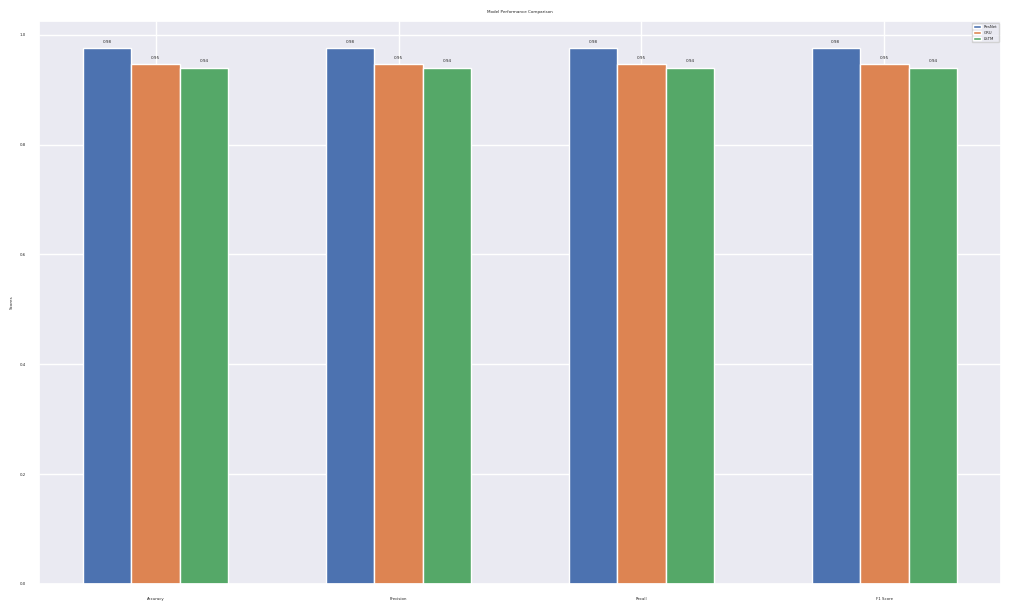

In [46]:
# Define the metrics for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
resnet_scores = [resnet_accuracy, resnet_precision, resnet_recall, resnet_f1]
gru_scores = [gru_accuracy, gru_precision, gru_recall, gru_f1]
lstm_scores = [lstm_accuracy, lstm_precision, lstm_recall, lstm_f1]

# Plot the metrics
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, resnet_scores, width, label='ResNet')
rects2 = ax.bar(x, gru_scores, width, label='GRU')
rects3 = ax.bar(x + width, lstm_scores, width, label='LSTM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

In [47]:
print(resnet_scores)
print(gru_scores)
print(lstm_scores)

[0.976, 0.976001328260339, 0.976, 0.9759996879472631]
[0.947, 0.9470030603060307, 0.947, 0.9470005830705515]
[0.9405, 0.9405611545611546, 0.9405, 0.9405021272148748]


In [48]:
# ResNet confusion matrix
resnet_cm = confusion_matrix(resnet_y_true, resnet_predictions)
print(resnet_cm)
# GRU confusion matrix
gru_cm = confusion_matrix(gru_y_true, gru_predictions)
print(gru_cm)

# LSTM confusion matrix
lstm_cm = confusion_matrix(lstm_y_true, lstm_predictions)
print(lstm_cm)

[[963  25]
 [ 23 989]]
[[936  52]
 [ 54 958]]
[[934  54]
 [ 65 947]]
